In [2]:
import os, sys
os.system('source /cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy/setup.sh')

0

In [3]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import sys
sys.path.append('/cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy')
from root_data_loader import load_data, classWtoSampleW
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

/cms/ldap_home/yeonjoon/miniconda3/envs/ML-torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Welcome to JupyROOT 6.26/06
True
Tesla P100-PCIE-16GB
1
cuda


In [1]:
varlist = ['bvsc_w_u','bvsc_w_d','cvsl_w_u','cvsl_w_d','cvsb_w_u','cvsb_w_d','n_bjets','n_cjets','weight']
# varlist.extend(['n_jets',
#                 'pt_had_t_b','pt_w_u','pt_w_d','pt_lep_t_b',
#                 'eta_had_t_b','eta_w_u','eta_w_d','eta_lep_t_b',
#                 'bvsc_lep_t_b','bvsc_had_t_b',
#                 'm_w_u','m_w_d'])


# varlist = ['bvsc_w_u','bvsc_w_d','cvsl_w_u','cvsl_w_d','cvsb_w_u','cvsb_w_d','n_bjets','n_cjets','pt_w_u','pt_w_d','weight']


In [4]:
path_sample = 'root://cluster142.knu.ac.kr//store/user/yeonjoon'
#filename = 'Vcb_Mu_TTLJ_WtoCB_powheg_25.root'
filename = 'Vcb_2018_Mu_Reco_Tree.root' 
#,'Reco_41','Reco_23','Reco_21'
data =  load_data(file_path=os.path.join(path_sample,filename),varlist=varlist,test_ratio=0,val_ratio=0,sigTree=['Reco_45'],bkgTree=[])
 

root://cluster142.knu.ac.kr//store/user/yeonjoon/Vcb_2018_Mu_Reco_Tree.root
Full dataset, For validation
[0.0053459  0.0043507  0.03749209 0.03283206 0.8746199  0.88254017
 0.         1.        ]


In [6]:
model = TabNetClassifier()
model.load_model('/cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy/TabNet_template/model_2.pt.zip')

/cms/ldap_home/yeonjoon/miniconda3/envs/ML-torch/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [7]:
model._compute_feature_importances(data['val_features'][:100000])

100%|██████████| 33/33 [00:01<00:00, 28.08it/s]


array([0.        , 0.19384173, 0.48342302, 0.        , 0.        ,
       0.12791057, 0.19482467, 0.        , 0.        , 0.        ])

In [8]:
import pandas as pd
importance=model._compute_feature_importances(data['train_features'][:300000])
importance = pd.Series(importance)

100%|██████████| 129/129 [00:03<00:00, 35.67it/s]


[Text(0, 0, 'bvsc_w_u'),
 Text(1, 0, 'bvsc_w_d'),
 Text(2, 0, 'cvsl_w_u'),
 Text(3, 0, 'cvsl_w_d'),
 Text(4, 0, 'cvsb_w_u'),
 Text(5, 0, 'cvsb_w_d'),
 Text(6, 0, 'n_bjets'),
 Text(7, 0, 'n_cjets'),
 Text(8, 0, 'pt_w_u'),
 Text(9, 0, 'pt_w_d')]

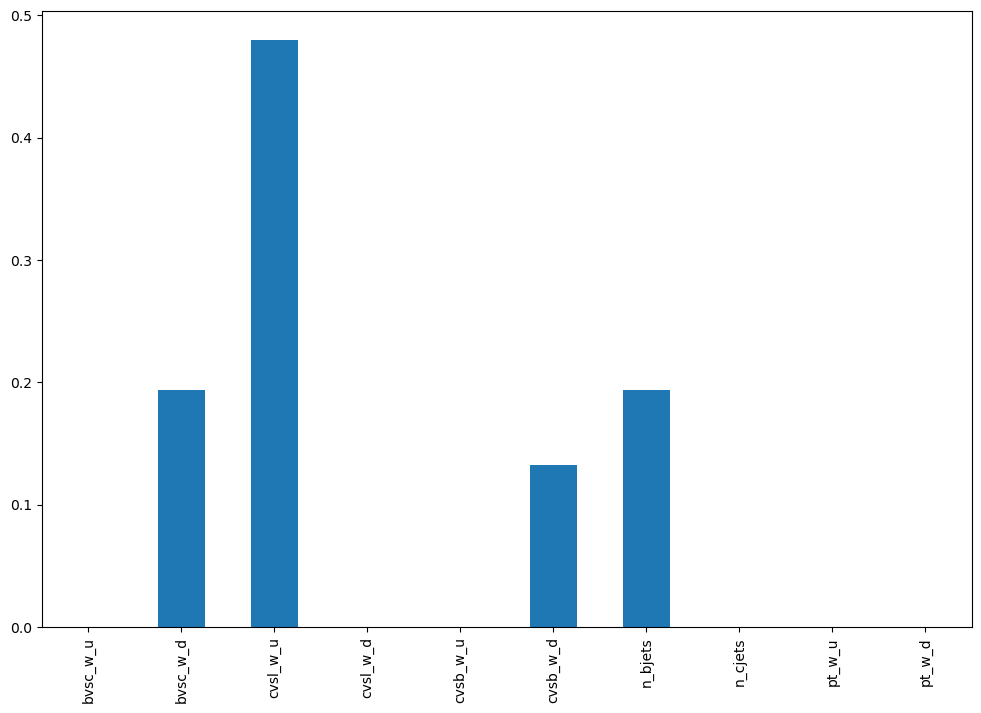

In [9]:
varlist2 = ['bvsc_w_u','bvsc_w_d','cvsl_w_u','cvsl_w_d','cvsb_w_u','cvsb_w_d','n_bjets','n_cjets','pt_w_u','pt_w_d']

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
fig = importance.plot(kind='bar')
fig.set_xticklabels(varlist2)

In [10]:
import ROOT
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys,os
sys.path.append('/cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy')
ROOT.EnableImplicitMT(16)
from root_data_loader import load_data
model = TabNetClassifier()
model.load_model('/cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy/TabNet_template/model.pt.zip')
modelist = ['45','43','41','23','21']
varlist = ['bvsc_w_u','bvsc_w_d','cvsl_w_u','cvsl_w_d','cvsb_w_u','cvsb_w_d','n_bjets','n_cjets','pt_w_u','pt_w_d','weight']
# varlist.extend(['n_jets',
#                 'pt_had_t_b','pt_w_u','pt_w_d','pt_lep_t_b',
#                 'eta_had_t_b','eta_w_u','eta_w_d','eta_lep_t_b',
#                 'bvsc_lep_t_b','bvsc_had_t_b',
#                 'm_w_u','m_w_d'])
result = []

/cms/ldap_home/yeonjoon/miniconda3/envs/ML-torch/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [11]:
for mode in modelist:
    #data =  load_data(file_path='root://cms-xrdr.private.lo:2094//xrd/store/user/yeonjoon/Vcb_2018_Mu_Reco_Tree.root',varlist=varlist,test_ratio=0,val_ratio=0,sigTree=[f'Reco_{mode}'],bkgTree=[])
    # arr = data['train_features']
    # plt.hist(model.predict_proba(arr)[:,1],bins=40)
    # plt.savefig(f'/cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy/TabNet_template/result_{mode}.png')
    # plt.clf()
    # del data
    # del arr
    
    # data =  load_data(file_path='root://cluster142.knu.ac.kr//store/user/yeonjoon/Vcb_2018_Mu_Reco_Tree.root',varlist=varlist,test_ratio=0,val_ratio=0.2,sigTree=[f'Reco_{mode}'],bkgTree=[])
    # arr = data['val_features']
    # plt.hist(model.predict_proba(arr)[:,1],bins=40)
    # plt.savefig(f'/cms/ldap_home/yeonjoon/working_dir/VcbMVAStudy/TabNet_template/result_{mode}_val.png')
    # plt.clf()
    # del arr
    # del data
    arr = data['train_features'] 
    result.append(model.predict_proba(arr)[:,1])

(array([82457., 25779.,  7686.,  3173.,  2460.,  1978.,  2664.,   879.,
         1326.,  2943.]),
 array([8.30045537e-05, 2.27654129e-02, 4.54478227e-02, 6.81302324e-02,
        9.08126384e-02, 1.13495044e-01, 1.36177450e-01, 1.58859864e-01,
        1.81542277e-01, 2.04224676e-01, 2.26907089e-01]),
 <BarContainer object of 10 artists>)

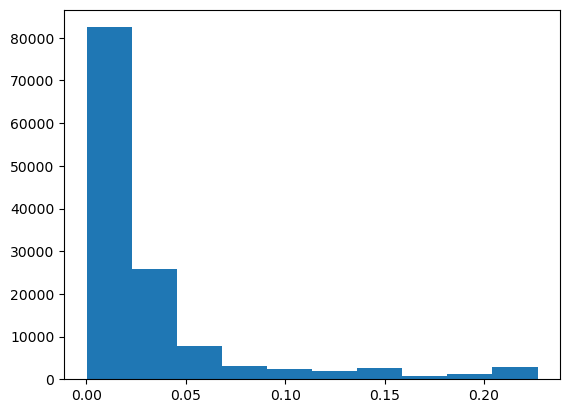

In [12]:
plt.hist(result[0])